In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [32]:
df = pd.read_csv(r'C:\Users\wjustice\Desktop\StockData\AppleStocks.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-07-27,123.61,122.12,123.09,122.77,44455500.0,113.15
1,2015-07-28,123.91,122.55,123.38,123.38,33618100.0,113.71
2,2015-07-29,123.50,122.27,123.15,122.99,37011700.0,113.35
3,2015-07-30,122.57,121.71,122.32,122.37,33628300.0,112.78
4,2015-07-31,122.64,120.91,122.60,121.30,42885000.0,111.79


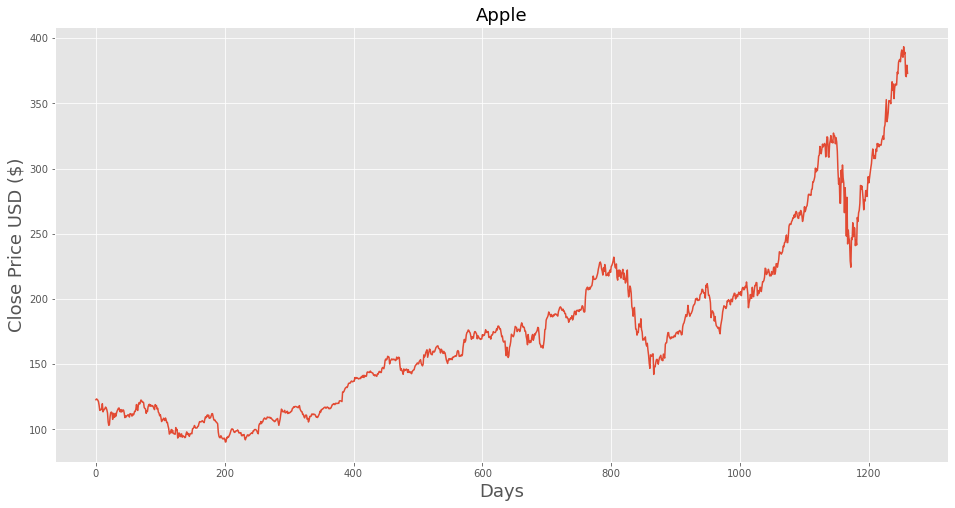

In [33]:
plt.figure(figsize=(16,8))
plt.title('Apple', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [34]:
APL =df[['Close']]
APL.head()

,Close
0,122.77
1,123.38
2,122.99
3,122.37
4,121.30


In [35]:
APL.tail()

,Close
1256,389.09
1257,371.38
1258,370.46
1259,379.24
1260,373.01


In [36]:
future_days = 25

In [37]:
APL['Prediction'] = APL[['Close']].shift(-future_days)

<ipython-input-37-58c360bb254e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APL['Prediction'] = APL[['Close']].shift(-future_days)


In [38]:
APL.tail()

,Close,Prediction
1256,389.09,NaN
1257,371.38,NaN
1258,370.46,NaN
1259,379.24,NaN
1260,373.01,NaN


In [39]:
X = np.array(APL.drop(['Prediction'], 1))[:-future_days]
print(X)

[[122.77]
 [123.38]
 [122.99]
 ...
 [351.73]
 [349.72]
 [358.87]]


In [40]:
y = np.array(APL['Prediction'])[:-future_days]
print(y)

[112.76 107.72 112.34 ... 370.46 379.24 373.01]


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [42]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [43]:
lr = LinearRegression().fit(x_train, y_train)

In [44]:
x_future = APL.drop(['Prediction'], 1)[:-future_days]

In [45]:
x_future = x_future.tail(future_days) 

In [46]:
x_future = np.array(x_future)
x_future

array([[314.96],
       [313.14],
       [319.23],
       [316.85],
       [318.89],
       [316.73],
       [318.11],
       [318.25],
       [317.94],
       [321.85],
       [323.34],
       [325.12],
       [322.32],
       [331.5 ],
       [333.46],
       [343.99],
       [352.84],
       [335.9 ],
       [338.8 ],
       [342.99],
       [352.08],
       [351.59],
       [351.73],
       [349.72],
       [358.87]])

In [47]:
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()

[366.53 360.06 319.1  353.63 361.78 364.8  364.11 364.11 364.11 252.86
 289.03 383.01 383.68 388.23 388.23 390.9  389.09 385.31 385.31 388.
 389.09 371.38 370.46 379.24 373.01]



In [60]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[324.81119601 322.92530325 329.23579057 326.76962311 328.88348093
 326.64527853 328.07524118 328.22030985 327.89908636 331.95064718
 333.49459236 335.33903693 332.43766345 341.95002364 343.98098508
 354.89222178 364.06263439 346.50932483 349.51431879 353.85601696
 363.27511873 362.76737837 362.91244704 360.82967537 370.31094942]


In [67]:
predictions = lr_prediction

In [68]:
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-68-dcea2e9c1712>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


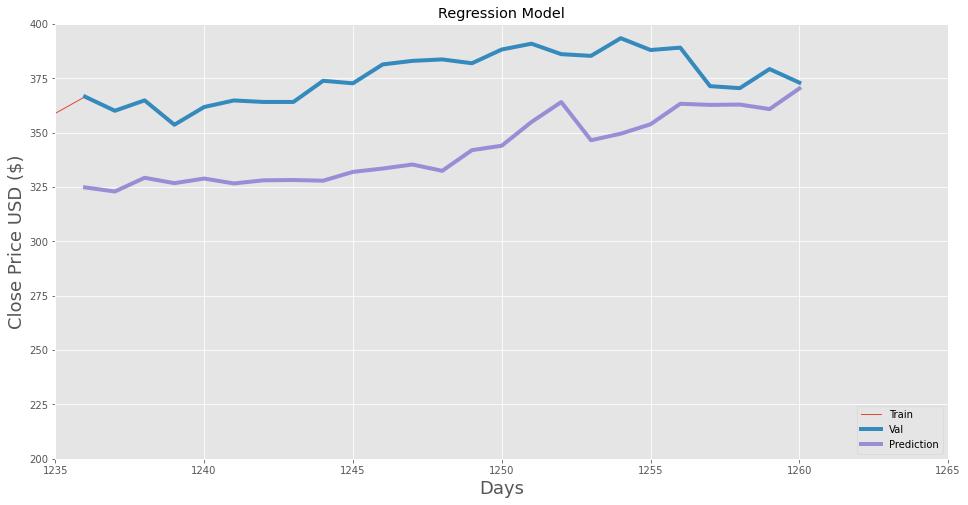

In [70]:
plt.figure(figsize=(16,8))
plt.title('Regression Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'], linewidth= 1)
plt.xlim(1235, 1265)
plt.ylim(200,400)
plt.plot(valid[['Close','Predictions']], linewidth = 4)
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

In [64]:
predictions = tree_prediction

In [65]:
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-65-dcea2e9c1712>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


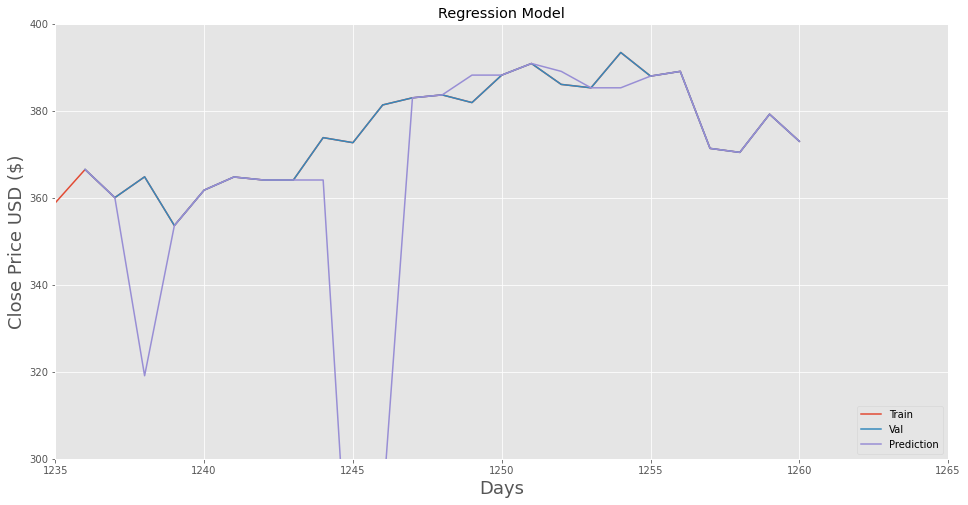

In [66]:
plt.figure(figsize=(16,8))
plt.title('Regression Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'],)
plt.xlim(1235, 1265)
plt.ylim(300,400)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()